# Лабораторная работа 5. Определение объектов на изображении

### Цель:
научиться способам обработки, фильтрации изображений для выполнения задачи определения количества объектов на изображении

In [ ]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np

В этой работе импортируем еще один вспомогательный модуль под названием `imutils`

### Загрузка изображения и вывод его на экран

width=482, height=250, depth=3


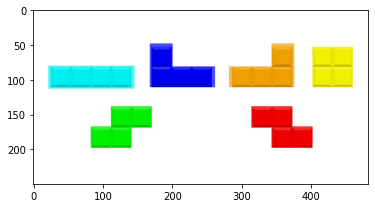

In [ ]:
image = cv2.imread("tetris.png")
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
(h, w, d) = image.shape

print("width={}, height={}, depth={}".format(w, h, d))

plt.imshow(image)

### Преобразование изображения в оттенки серого

С помощью функции `cv2.cvtColor` можно перевести изображение в формат оттенков серого. В качестве аргументов функция использует само изображение, а также аргумент `cv2.COLOR_RGB2GRAY`, который и переводит изображение из формата RGB в формат GRAY.

Для вывода на экран изображения в оттенках серого в функции `plt.imshow` понадобится еще один аргумент `cmap='gray'`.

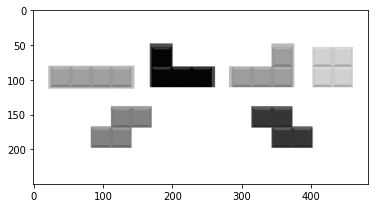

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

### Обнаружение края

Функция `cv2.Canny` устанавливает границы (контуры) объектов на изображении. Для этого в качестве аргументов она принимает само изображение и пороговые значения: `30` и `150`.

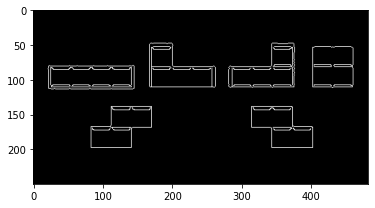

In [ ]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

### Пороговое значение

Перед нахождением контуров мы устанавливаем пороговое значение для изображения в градациях серого. Мы выполнили двоичный инверсный порог, чтобы фигуры переднего плана стали белыми, а фон - черным.

Функция `cv2.threshold` устанавливает порог изображения, превращая все значения пикселей более 225 в 255 (белый; передний план) и все значения пикселей меньше 225 в 0 (черный; фон), тем самым сегментируя изображение, делая его черно-белым.

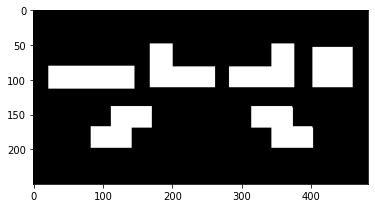

In [ ]:
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

### Обнаружение и рисование контуров

`cv2.findContours` - функция определяет координаты контуров объектов, которые четко определены на черно-белым изображении.

`imutils.grab_contours(cnts)` - формат координат контуров в удобный для обработки формат и сохранение их в переменную `cnts`. В переменной теперь хранится список контуров.

`cv2.drawContours` - рисует контуры вокруг объектов, используя линию определенного цвета и толщины.

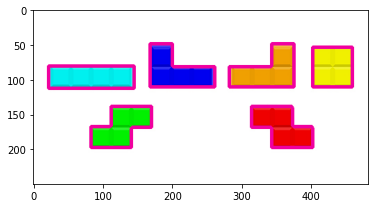

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

for c in cnts:
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
plt.imshow(output, cmap='gray')

### Определение площади контуров

Площадь контура определяется с использованием функции `cv2.minAreaRect()`, которая возвращает три элемента:
- `координаты` центра прямоугольника, его `размеры` (ширина и высота), `угол` поворота, то есть (x, y), (w, h), a.

Для определения площади нужно взять второй элемент (с индексом [1]) и перемножить ширину на высоту

In [ ]:
for n,c in enumerate(cnts):
    rect = cv2.minAreaRect(c)
    area = int(rect[1][0]*rect[1][1])
    print(f'площадь контура {n} равна {area}')

площадь контура 0 равна 5192
площадь контура 1 равна 5133
площадь контура 2 равна 3935
площадь контура 3 равна 3249
площадь контура 4 равна 5766
площадь контура 5 равна 5766


### Вывод на экран изображения с самой большой площадью контура

Для этого объединяем две предыдущих записи. Запоминаем, какая площадь самая большая, и выводим в качестве результата то, что ей наиболее близко соответствует.

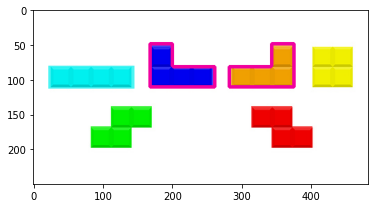

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

for n,c in enumerate(cnts):
    rect = cv2.minAreaRect(c)
    area = int(rect[1][0]*rect[1][1])
    if area > 5700:
        cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
plt.imshow(output, cmap='gray')

# Наложение текста на изображение

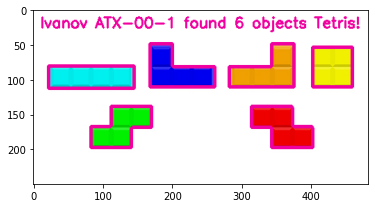

In [ ]:
# draw the total number of contours found in purple
text = "{} found {} objects {}!".format('Ivanov ATX-00-1', len(cnts), 'Tetris')
cv2.putText(output, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (240, 0, 159), 2)
plt.imshow(output)

### Определение объектов заданного цвета

Для выделения объектов только одного цвета необходимо создать маску по цвету. Для этого изображение необходимо перевести в цветовое пространство `HSV` с помощью функции `cv2.COLOR_BGR2HSV`.

Затем нужно посмотреть значения цветов интересующей нас фигуры, обратившись к ее пикселю по координате [100,100]. Возьмем для примера голубую фигуру. Это позволит нам подобрать границы фильтра для голубого цвета (переменные `hsv_min` и `hsv_max`).

И потом с помощью функции `cv2.inRange` накладываем маску на изображение, после чего выводим его на экран.

Сначала выводим код цвета по координатам

In [ ]:
image = cv2.imread("tetris.png")
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV )
color = hsv_img[100,300]
print('Код цвета фигуры голубого цвета: ', color)

Код цвета фигуры голубого цвета:  [ 20 254 240]


### Вывод на экран только фигуры выбранного цвета в черно-белых тонах:

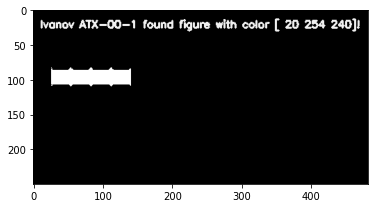

In [ ]:
hsv_min = np.array((80, 240, 230), np.uint8)
hsv_max = np.array((100, 255, 255), np.uint8)

hsv_msk = cv2.inRange(hsv_img, hsv_min, hsv_max )
text = "{} found figure with color {}!".format('Ivanov ATX-00-1', color)
cv2.putText(hsv_msk, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (240, 0, 159), 2)

plt.imshow(hsv_msk, cmap='gray')

# Задание по работе

1. Выпишите все непонятные вам функции (конструкции языка Python) из этой лабораторной работы. Кратко напишите, что они означают.
2. Нарисуйте в Paint в виде блок-схемы методику определения объектов на изображении.
3. Загрузите в блокнот фотографию по вашему варианту, вариант выбирается в начале работы. В одной подгруппе варианты не должны совпадать более, чем у двух студентов. Варианты заданий представлены в начале этих методических указаний.
4. По представленной в работе методике определите контуры объектов на изображении, обведя их зелеными линиями.
5. В случае, если программа обнаруживает много лишних контуров, то уберите их, используя функцию определения площади фигуры, оставив только те контуры, которые принадлежат правильным объектам.
6. Выполните поиск объекта только одного цвета по представленной в работе методике.
7. Напишите на получившемся в результате изображении следующий текст: <ФИО, группа> нашел <указать количество> объектов <указать название объекта> <указать цвет объекта> цвета. Надписи делать на английском языке или транслитом.

***Все задания выполняются в отдельной ячейке***

In [ ]:
# вписать ваш код сюда в ячейку

## Контрольные вопросы:
1. Принцип работы функции обнаружения краев. Почему на некоторых объектах найдено несколько краев? Зачем нужно использовать изображение в оттенках серого?
2. Принцип пороговой сегментации изображения. Какие еще бывают аргументы функции cv2.threshold?
3. Каким образом происходит обнаружение контуров с помощью функции cv2.findContours? Перечислите основные аргументы?
4. Зачем нужна функция grab_contours?
5. Принцип работы функции cv2.drawContours
6. Как определяется площадь объекта на изображении? Для чего это можно использовать?
7. В чем суть применения маски для изображения? Зачем нужно использовать пространство HSV?
8. Принцип работы функции cv2.inRange.